Tornatora Raffaele  
Mat. 786357  
18/04/2019

# Esame Data Science - a.a. 2018/2019

Di seguitono sono proposti gli esercizi per la prova d'esame.
Per presentarsi all'esame è necessario aver implementato una soluzione per tutti e 3 gli esercizi.

1. [Esercizio Decision Tree](#esercizio1)
2. [Esercizio regressione](#esercizio2)
3. [Esercizio clustering e classificazione con NN](#esercizio3)

<a id="esercizio1"></a>
## Esercizio Decision Tree

Per questo primo esercizio viene richiesto di creare un Decision Tree con le librerie python e di rappresentarne il risultato per farci dei ragionamenti.

I dati da utilizzare sono contenuti nel dataset `data/student-mat.csv`, che contiene dei dati sulle abitudini di consumo di alcool di studenti portoghesi. Il dataset contiene diverse colonne descritte nella lista qui sotto:
- school - la scuola a cui è iscritto lo studente (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
- sex - il genere dello studente (binario: 'F' - femmina o 'M' - maschi)
- age - l'età dello studente (numerico: da 15 a 22)
- address - il tipo di indirizzo della casa in cui abita lo studente (binario: 'U' - urbano o 'R' - rurale)
- famsize - la dimensione della famiglia (binario: 'LE3' - minore o uguale a 3 componenti o 'GT3' - maggiore di 3 componenti)
- Pstatus - lo stato di coabitazione dello studente (binario: 'T' - che vive insieme ad altri o 'A' - che vive isolato)
- Medu - l'educazione della madre (numerico: 0 - nessuna, 1 - educazione primaria, 2 – media, 3 – superiori 4 – università o educazione superiore)
- Fedu - l'educazione del padre (numerico: 0 - nessuna, 1 - educazione primaria, 2 – media, 3 – superiori 4 – università o educazione superiore
- Mjob - il lavoro della madre (nominale: 'teacher' - insegnante, 'health' - lavori in ambito sanitario, 'services' - pubblica amministrazione, 'at_home' - casalinga o 'other' - altro)
- Fjob - il lavoro del padre (nominale: 'teacher' - insegnante, 'health' - lavori in ambito sanitario, 'services' - pubblica amministrazione, 'at_home' - casalingo o 'other' - altro)
- reason - motivo di scelta per la scuola (nominale: 'home' - vicino a casa, 'reputation' - reputazione della scuola, 'course' - preferenza per il corso o 'other' - altro)
- guardian - guardiano dello studente (nominale: 'mother' - madre, 'father' - padre o 'other' - altro)
- traveltime - tempo di trasferimento da casa a scuola (numerico: 1 - <15 min., 2 - da 15 a 30 min., 3 - da 30 min. a 1 ora, o 4 - >1 ora)
- studytime - tempo settimanale di studio (numerico: 1 - <2 ore, 2 - da 2 a 5 ore, 3 - da 5 a 10 ore, o 4 - >10 ore)
- failures - numero dei passati fallimenti in classe (numerico: n se 1<=n<3, altrimenti 4)
- schoolsup - ripetizioni (binario: yes o no)
- famsup - supporto educativo da parte della famiglia (binario: yes o no)
- paid - classi pagate aggiuntive sul corso (matematica) (binario: yes o no)
- activities - attività extra-curricularari (binario: yes o no)
- nursery - ha frequentato l'asilo nido (binario: yes o no)
- higher - vuole frequentare l'università (binario: yes o no)
- internet - ha accesso a internat da casa (binario: yes o no)
- romantic - è in una relazione sentimentale (binario: yes o no)
- famrel - qualità delle relazioni famigliari (numerico: da 1 - molto cattive a 5 - eccellenti)
- freetime - tempo libero dopo scuola (numerico: da 1 - molto poco a 5 - molto)
- goout - esce con gli amici (numerico: da 1 - molto poco a 5 - molto spesso)
- Dalc - consumo di alcool in giorni infrasettimanali (numerico: da 1 - molto poco a 5 - molto)
- Walc - consumo di alcool durante i weekend (numerico: da 1 - molto poco a 5 - molto)
- health - stato attuale di salute (numerico: da 1 - pessimo a 5 - ottimo)
- absences - numero di assenze da scuola (numerico: da 0 a 93)

Questi voti, quindi, rappresentano il rendimento scolastico. In particolare questi voti sono relativi al corso di matematica:
- G1 - voto del primo semestre (numerico: da 0 a 20)
- G2 - voto del secondo semestre (numerica: da 0 a 20)
- G3 - voto finale (numerico: da 0 a 20)

Per l'esercizio è richiesto di creare un albero di decisione che descriva quali variabili influiscono maggiormente sul consumo alcolico nei ragazzi.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

### Librerie

In [1]:
# Per esportare e analizzare i dati
import pandas as pd
# Per il preprocessing e la creazione del modello
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Per visualizzazione features più influenti
import graphviz
import matplotlib.pyplot as plt

### Importazione ed esplorazione dati

In [2]:
# Importazione dati
data = pd.read_csv('./data/student-mat.csv')

# Esplorazione
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# Dimensioni
data.shape

(395, 33)

In [4]:
# Principali statistiche descrittive
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
# Missing values
mv = data.isnull().values.any()
if (mv == False):
    print("Il dataset non contiene valori mancanti")
else:
    print("Il dataset contiene valori mancanti" + "\n")
    mv = (data.isnull().sum() / data.values.len())*100
    print('La percentuale di valori mancanti nel dataset è del %0.2f %'.format(mv))

Il dataset non contiene valori mancanti


Una prima esplorazione dei dati mostra un dataset contenente 395 osservazioni e 33 attributi.
Le principali statistiche descrittive mostrano dei dati molto puliti, ovvero con una bassa varianza e senza valori estremi; a parte le variabili _absences_,_G1_,_G2_ e _G3_ la cui varianza è lievemente più elevata. Queste verranno normalizzate prima di essere inserite nel classificatore per fare in modo che non influenzino molto la classificazione.
Infine il dataset non continene valori mancanti.

### Preprocessing dei dati

In [6]:
# Normalizzazione features con elevata variabilità
normalizer = Normalizer()

data[['absences','G1','G2','G3']] = normalizer.transform(data[['absences','G1','G2','G3']])

In [7]:
# Trasformazione delle variabili testuali in numeriche
data.school = data.school.map({'GP': 0, 'MS': 1})
data.sex = data.sex.map({'F': 0, 'M': 1})
data.address = data.address.map({'U': 0, 'R': 1})
data.famsize = data.famsize.map({'LE3': 0, 'GT3': 1})
data.Pstatus = data.Pstatus.map({'T': 0, 'A': 1})
data.Mjob = data.Mjob.map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data.Fjob = data.Fjob.map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
data.reason = data.reason.map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
data.guardian = data.guardian.map({'mother': 0, 'father': 1, 'other': 2})
data.schoolsup = data.schoolsup.map({'yes': 0, 'no': 1})
data.famsup = data.famsup.map({'yes': 0, 'no': 1})
data.paid = data.paid.map({'yes': 0, 'no': 1})
data.activities = data.activities.map({'yes': 0, 'no': 1})
data.nursery = data.nursery.map({'yes': 0, 'no': 1})
data.higher = data.higher.map({'yes': 0, 'no': 1})
data.internet = data.internet.map({'yes': 0, 'no': 1})
data.romantic = data.romantic.map({'yes': 0, 'no': 1})

In [8]:
# Divisione tra training e test set
x = data.drop(['Dalc','Walc'], axis = 1)
# La label è la media tra il consumo di alcool durante la settimana e quello nel weekend
# perchè il classificatore non supporta la classificazione multi-class-multi-label (MCML):
# siccome la settimana è divisa in 5 giorni feriali e 2 festivi la media tra i consumi deve
# essere pesata con peso maggiore al consumo durante i giorni feriali.
# La label sarà quindi così calcolata: media(Dalc + (0.9 * Walk))
y_dalc = data['Dalc']
y_walc = data['Walc'] * 0.9 
y = np.around((y_dalc + y_walc) / 2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
# x features
# y labels

### Classificazione

#### Selezione del modello attraverso tuning con cross-validation 

In [9]:
tree_clf = DecisionTreeClassifier()

features = np.arange(1,len(x_train.columns))
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'max_features': features}
tree_opt = GridSearchCV(tree_clf, params, cv=5)
tree_opt.fit(x_train, y_train)

print("Il tuning con cross validation ha trovato come migliori parametri:" + "\n")
print('max_depth (massimo numero di livelli di profondità): {}'.format(tree_opt.best_params_['max_depth']))
print('max_features (numero massimo di features considerate per la selezione): {}'.format(tree_opt.best_params_['max_features']))
print("\n")
print('Ed ha ottenuto accuracy: %0.2f' %(tree_opt.best_score_))

Il tuning con cross validation ha trovato come migliori parametri:

max_depth (massimo numero di livelli di profondità): 2
max_features (numero massimo di features considerate per la selezione): 29


Ed ha ottenuto accuracy: 0.61


/Users/tornetto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Creazione del modello e fitting sul test set

In [10]:
clf_tree = DecisionTreeClassifier(max_depth= 2, max_features= 29)
clf_tree.fit(x_train, y_train)
features_names = x_train.columns.values

print('Accuracy: %0.2f' %(clf_tree.score(x_test, y_test)))

tree.export_graphviz(clf_tree,
                     out_file='./models/decision_tree.dot',
                     impurity=False,
                     feature_names = features_names,
                     class_names=['molto poco','poco','non poco','non tanto','tanto'],
                     rounded=True,
                     filled=True)

Accuracy: 0.50


#### visualizzazione albero

L'albero una volta esportato con WebGraphviz in formato dot viene convertito in formato PDF da terminale tramite il comando **dot -Tpng filename.dot -o new_file.png** e caricato nel notebook.

L'albero disegnato con [WebGraphViz](http://webgraphviz.com/):

<img src="./images/decision_tree.png">

### Analisi dei risultati

Il modello ha ottenuto un'accuracy discreta, 0.61, sul training set e sul test set, 0.50.  
L'albero mostra che la maggior parte degli studenti beve molto poco alcool e si può vedere che come prima variabile utilizzata sia goout, ovvero qunto lo studente esce con gli amici; poi al secondo livello utilizza il tempo di studio medio durante la settimana e il sesso dello studente.

Text(0.5, 1.0, 'Importance of the features for the tree')

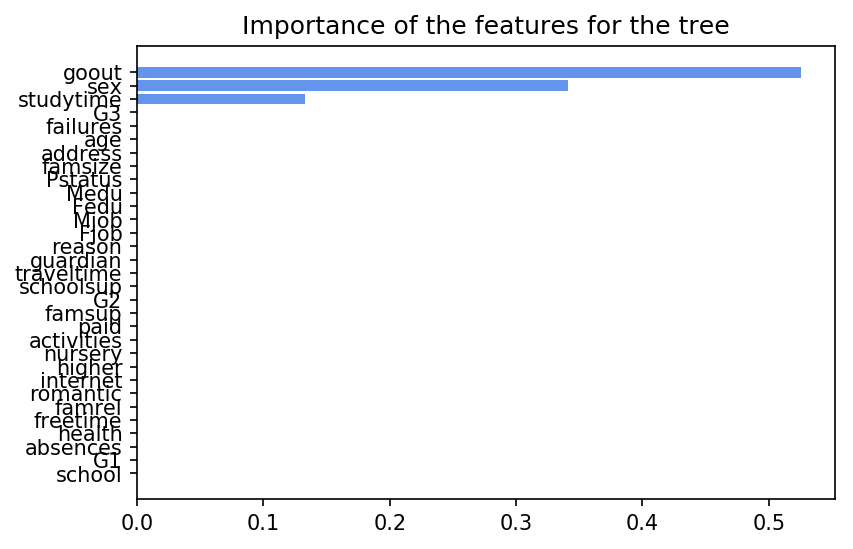

In [11]:
# Visualizzazione dell'importanza delle features
features_names = x_train.columns.values
imps = clf_tree.feature_importances_
feats_df = {'feats_names': features_names, 'imps': imps}
feats_df = pd.DataFrame(data= feats_df)
feats_df = feats_df.sort_values(by=['imps'])

plt.figure(dpi= 150)
plt.barh(feats_df['feats_names'], feats_df['imps'], color = 'cornflowerblue')
plt.title("Importance of the features for the tree")

Il bar chart orizzontale che mostra l'importanza delle variabili secondo il modello prova quanto scritto sopra, mostrando più in dettaglio che il sesso dello studente è considerato più importante del tempo che dedica settimanalmente allo studio.  
  
Adesso che abbiamo visto le variabili più importanti vediamo come incidono sul consumo medio di alcool attraverso degli scatter plot:

Text(0, 0.5, 'Esce con gli amici')

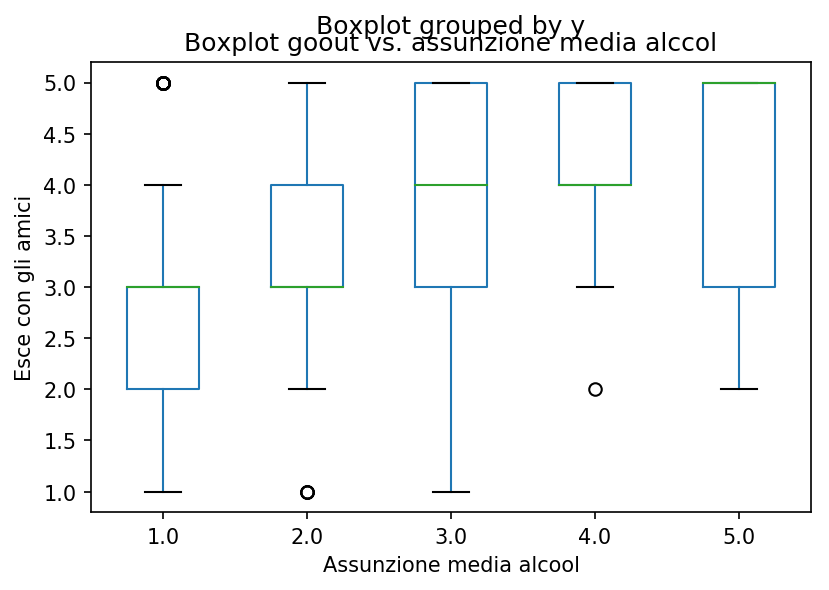

In [22]:
# Boxplot goout vs. assunzione media alcool
data['y'] = y

fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
data.boxplot(column=['goout'], by= ['y'], grid= False, ax= ax)
ax.set_title("Boxplot goout vs. assunzione media alccol")
ax.set_xlabel("Assunzione media alcool")
ax.set_ylabel("Esce con gli amici")

Il boxplot mostra una proporzione diretta non molto accentuata, ovvero dimostra che chi esce di più con gli amici tende ad assumere più alcool.

Text(0, 0.5, 'Sesso (0: Femmina, 1: Maschio)')

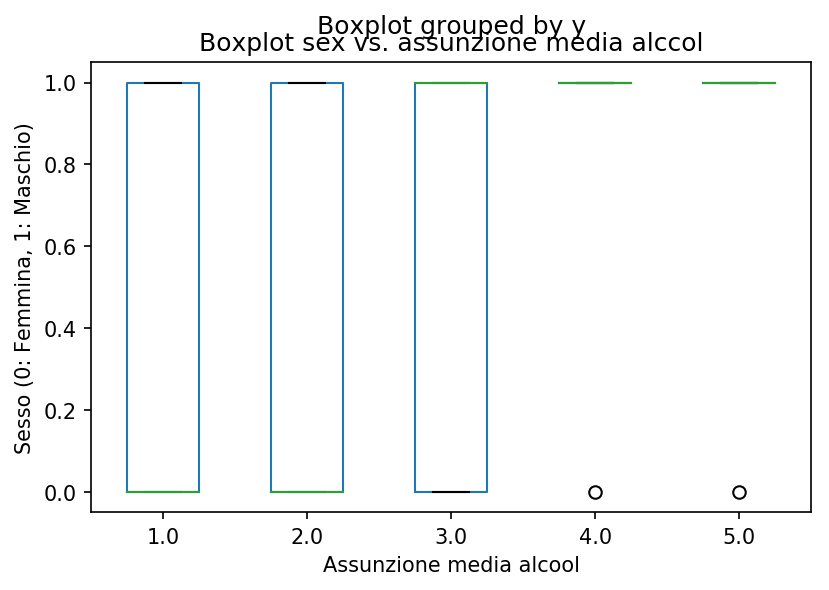

In [23]:
# Boxplot sex vs. assunzione media alcool

fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
data.boxplot(column=['sex'], by= ['y'], grid= False, ax= ax)
ax.set_title("Boxplot sex vs. assunzione media alccol")
ax.set_xlabel("Assunzione media alcool")
ax.set_ylabel("Sesso (0: Femmina, 1: Maschio)")

Il boxplot mostra chiaramente che i maschi tendono ad assumere alcool più delle femmine.

Text(0, 0.5, 'Ore di studio settimanali')

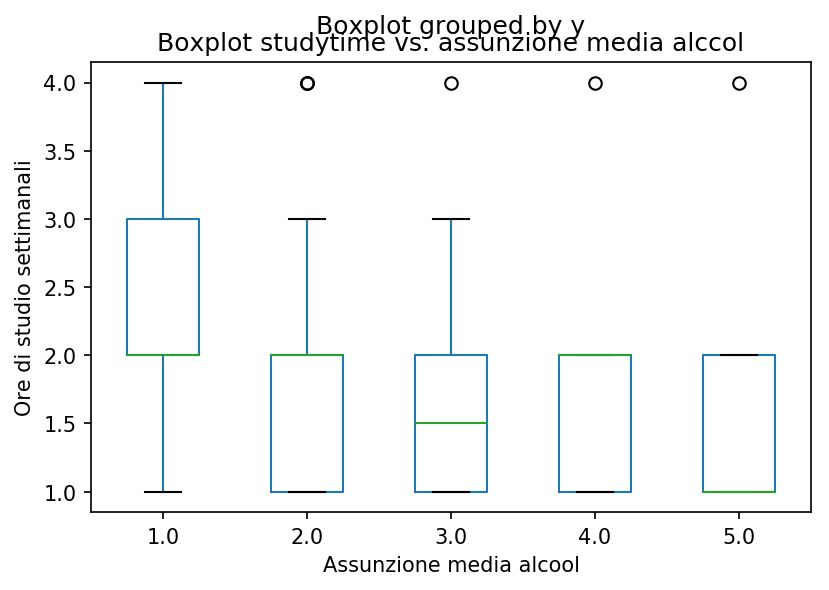

In [24]:
# Boxplot studytime vs. assunzione media alcool

fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
data.boxplot(column=['studytime'], by= ['y'], grid= False, ax= ax)
ax.set_title("Boxplot studytime vs. assunzione media alccol")
ax.set_xlabel("Assunzione media alcool")
ax.set_ylabel("Ore di studio settimanali")

Il boxplot mostra una proporzione inversa molto accentuata, ovvero dimostra che chi studia di meno durante la settimana tende ad assumere più alcool.

<a id="esercizio2"></a>
## Esercizio regressione

Questo secondo esercizio richiede di effettuare una regressione lineare con una o più variabili.

Leggendo il dataset `data/adminisson.csv`, caricare i dati gli esiti dei vari test di studenti americani. Per ogni studente, il dataset riporta la probabilità di essere ammesso alla scuola a cui ha fatto application.

L'esercizio chiede di creare un modello di regressione che, considerando i risultati dei test, sia in grado di prevedere le probabilità di ammissione.

Il modello deve essere creato con tutte le variabili indipendenti presenti nel dataset *(in questo caso, però, non sarà possibile effettuarne una rappresentazione grafica)*. In questo caso, tuttavia, sarà possibile creare il modello e discuerne la qualità di predizione.

In aggiunta, è richiesto di selezionare il test (o al massimo i 2 test) che correlano maggiormente con la probabilità di essere ammesso alla scuola e quindi di fare una nuova regressione solo con quella (o quelle) variabili in modo che sia rappresentabile graficamente con un grafico scatter.

### Librerie

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Preprocessing dei dati
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Per la creazione del modello
import statsmodels.api as sm
# Per le analisi sul modello
from sklearn.metrics import r2_score

### Importazione ed esplorazione dati

In [2]:
# Importazione dati
data = pd.read_csv('./data/admission.csv')

# Esplorazione
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Dimensioni
data.shape

(400, 9)

In [4]:
# Principali statistiche descrittive
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# Missing values
mv = data.isnull().values.any()
if (mv == False):
    print("Il dataset non contiene valori mancanti")
else:
    print("Il dataset contiene valori mancanti" + "\n")
    mv = (data.isnull().sum() / data.values.len())*100
    print('La percentuale di valori mancanti nel dataset è del %0.2f %'.format(mv))

Il dataset non contiene valori mancanti


Text(0.5, 1.0, 'Boxplot attributi')

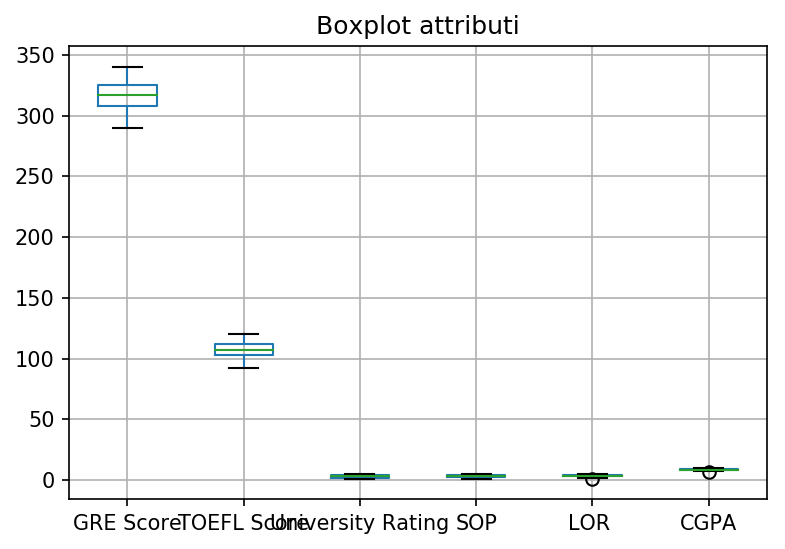

In [6]:
# Boxplot per la ricerca di outliers
fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
data.boxplot(column=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'], ax= ax)
ax.set_title("Boxplot attributi")

Il dataset contiene 400 osservazioni e 9 attributi, di cui quelli rilevanti sono 8 in quanto il primo attributo indica l'id dello studente. Il dataset non contiene valori mancanti.   
Nessun attributo ha una distribuzione con elevata variabilità; però i valori degli attributi sono in range di valori particolarmente diversi tra loro, quindi gli attributi andranno normalizzati prima dell'addrestramento del modello.  
Infine il boxplot rappresentante le principali variabili mostra alcuni outliers negli attributi LOR e CGPA, e questi valori andranno rimossi dal dataset in fase di preprocessing in quanto tendono a gravare sulle prestazioni del modello.

### Preprocessing dati

In [7]:
# Eliminazione outliers
to_drop = []

for attr in ['LOR ','CGPA']:
    m_val = data[attr].mean()
    q3 = data[attr].quantile(0.75)
    q1 = data[attr].quantile(0.25)
    iqr = q3 - q1
    l_wks = m_val - (1.5 * iqr)
    u_wks = m_val + (1.5 * iqr)
    l_idx = data[data[attr] < l_wks].index
    u_idx = data[data[attr] > u_wks].index
    for i in l_idx:
        to_drop.append(i)
    for i in u_idx:
        to_drop.append(i)
    
to_drop = np.unique(to_drop)
perc_to_drop = (len(to_drop) / data.shape[0]) * 100
print('Percentuale di outliers nel dataset: {:0.2f}%'.format(perc_to_drop))
if (perc_to_drop < 20):
    print("La percentuale di outliers è inferiore al 20%, procedo all'eliminazione...")
    data = data.drop(labels= to_drop)
    print("Outliers eliminati")
else:
    print("La percentuale di outliers è superiore al 20%; per non perdere troppi dati procedo all'eliminazione del 20% dei dati...")
    to_drop = to_drop[0:79]
    data = data.drop(labels= to_drop)
    print("Outlilers eliminati")

Percentuale di outliers nel dataset: 11.50%
La percentuale di outliers è inferiore al 20%, procedo all'eliminazione...
Outliers eliminati


In [8]:
# Selezione variabili
x = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y = data['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Regressione: modello composto da tutte le variabili vs. Probabilità di essere ammesso

In [9]:
x_sm = sm.add_constant(x_train)
regr_all = sm.OLS(y_train, x_sm).fit(normalize= True)

y_pred_test = regr_all.predict(sm.add_constant(x_test))

print(regr_all.summary())
print("\n")
print('R2 sul test set: %0.3f' % r2_score(y_test, y_pred_test))

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     99.51
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           3.50e-67
Time:                        10:56:14   Log-Likelihood:                 312.07
No. Observations:                 247   AIC:                            -608.1
Df Residuals:                     239   BIC:                            -580.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2027      0.17

/Users/tornetto/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


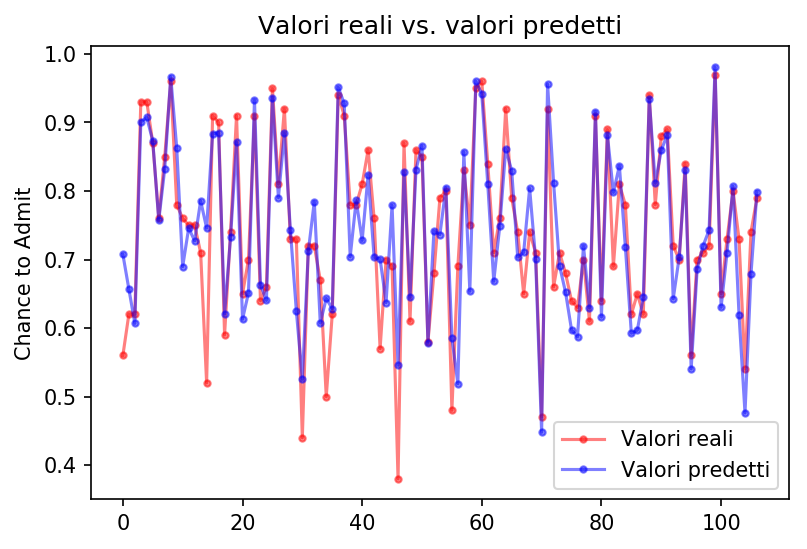

In [10]:
# Grafico che mostra i valori predetti contro i valori reali
index = np.arange(0,y_test.shape[0])

plt.figure(dpi= 150)
plt.plot(index, y_test, 'r-', marker= '.', label = "Valori reali", alpha = 0.5)
plt.plot(index, y_pred_test, 'b-', marker= '.', label = "Valori predetti", alpha = 0.5)
plt.title("Valori reali vs. valori predetti")
plt.ylabel("Chance to Admit")
plt.legend(loc='best')

Il modello è significativo secondo il test di Dublin-Watson con uno score di 2.008; presenta un buon R2 score, 0.745, sul training set e un buon 0.779 sul test set.  
Il modello mostra che i test più significativi sono LOR e CGPA; di cui faremo un nuovo modello che potremo rappresentare graficamente tramite uno scatter plot 3D.  
Inoltre, rispetto all'R2 score sul test set e al grafico rappresentante i valori reali vs. i predetti, il modello predice la probabilità di ammissione molto bene.

### Regressione: modello LOR e CGPA vs. Probabilità di essere ammesso

Text(0.5, 1.0, 'Correlazione tra variabili LOR, CGPA e Chance of Admit')

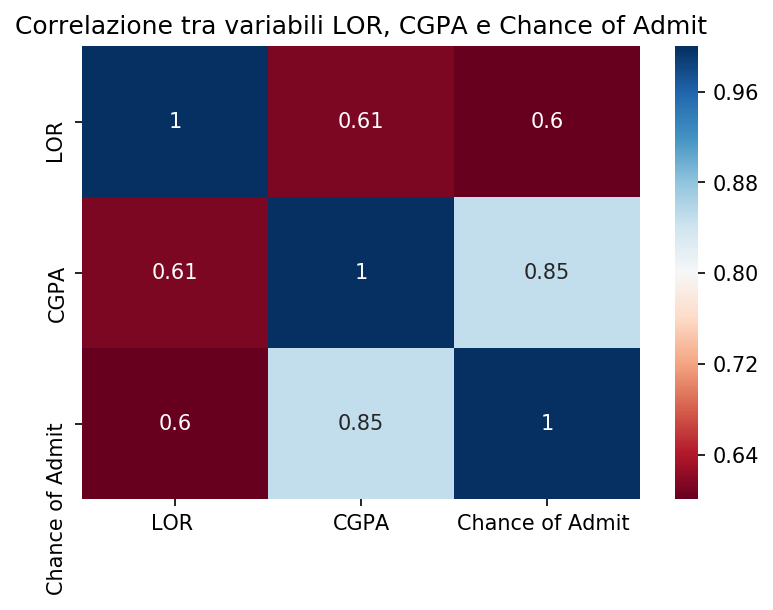

In [12]:
# Heatmap rappresentante la correlazione tra le variabili d'interesse per il modello
vars_corr = data[['LOR ','CGPA','Chance of Admit ']].corr()

fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
ax = sns.heatmap(vars_corr, cmap='RdBu', annot= True, 
                 xticklabels=vars_corr.columns.values,
                 yticklabels=vars_corr.columns.values)
ax.set_title("Correlazione tra variabili LOR, CGPA e Chance of Admit")

Text(0, 0.5, 'Possibilità di essere ammesso')

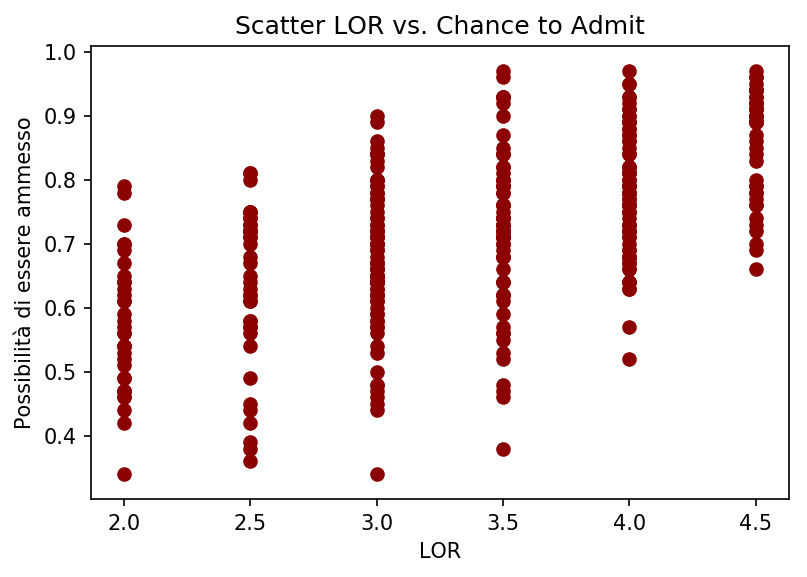

In [13]:
# Scatter plot LOR vs. Chance to Admit
plt.figure(dpi= 150)
plt.scatter(data['LOR '], data['Chance of Admit '], c= 'darkred')
plt.title("Scatter LOR vs. Chance to Admit")
plt.xlabel("LOR")
plt.ylabel("Possibilità di essere ammesso")

Text(0, 0.5, 'Possibilità di essere ammesso')

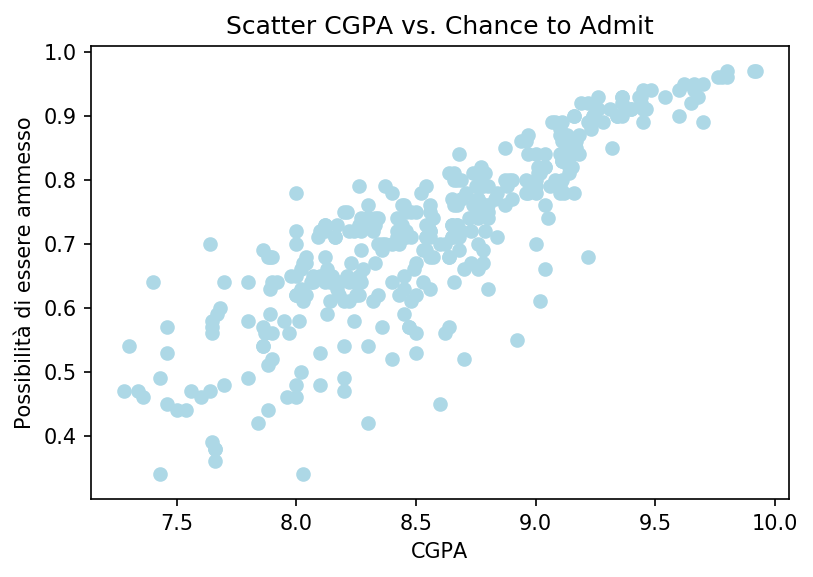

In [14]:
# Scatter plot CGPA vs. Chance to Admit
plt.figure(dpi= 150)
plt.scatter(data['CGPA'], data['Chance of Admit '], c= 'lightblue')
plt.title("Scatter CGPA vs. Chance to Admit")
plt.xlabel("CGPA")
plt.ylabel("Possibilità di essere ammesso")

Dai grafici sopra si vede che sia LOR che CGPA sono direttamente proporzionali a Chance to Admit, la prima in maniera molto accentuata.    
Per quanto riguarda le correlazioni possiamo vedere un'alta correlazione tra CGPA e Chance to Admit e una discreta correlazione tra Research e Chance to Admit.

In [15]:
# Selezione dei nuovi dati
x_best = x[['LOR ', 'CGPA']]

x_train, x_test, y_train, y_test = train_test_split(x_best, y, test_size = 0.3)

In [16]:
# Regressione con risultati
x_sm = sm.add_constant(x_train)
regr_best = sm.OLS(y_train, x_sm).fit()

y_pred_test = regr_best.predict(sm.add_constant(x_test))

print(regr_best.summary())
print("\n")
print('R2 sul test set: %0.3f' % r2_score(y_test, y_pred_test))

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     323.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           2.17e-69
Time:                        11:06:44   Log-Likelihood:                 301.88
No. Observations:                 247   AIC:                            -597.8
Df Residuals:                     244   BIC:                            -587.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9935      0.077    -12.895      0.0

/Users/tornetto/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


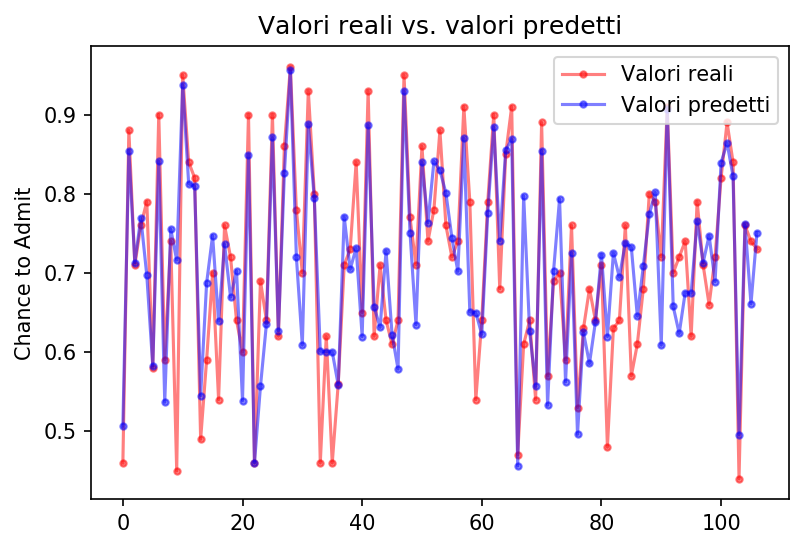

In [17]:
# Grafico che mostra i valori predetti contro i valori reali
index = np.arange(0,y_test.shape[0])

plt.figure(dpi= 150)
plt.plot(index, y_test, 'r-', marker= '.', label = "Valori reali", alpha = 0.5)
plt.plot(index, y_pred_test, 'b-', marker= '.', label = "Valori predetti", alpha = 0.5)
plt.title("Valori reali vs. valori predetti")
plt.ylabel("Chance to Admit")
plt.legend(loc='best')

Il modello è significativo secondo il test di Dublin-Watson; però è lievemente peggiore rispetto al precedente sia per quanto riguarda il punteggio sul training set che sul test set. Questo è probabilmente dovuto al fatto che il modello più semplice non serva a predire meglio la probabilità.

#### Visualizzazione grafica del modello

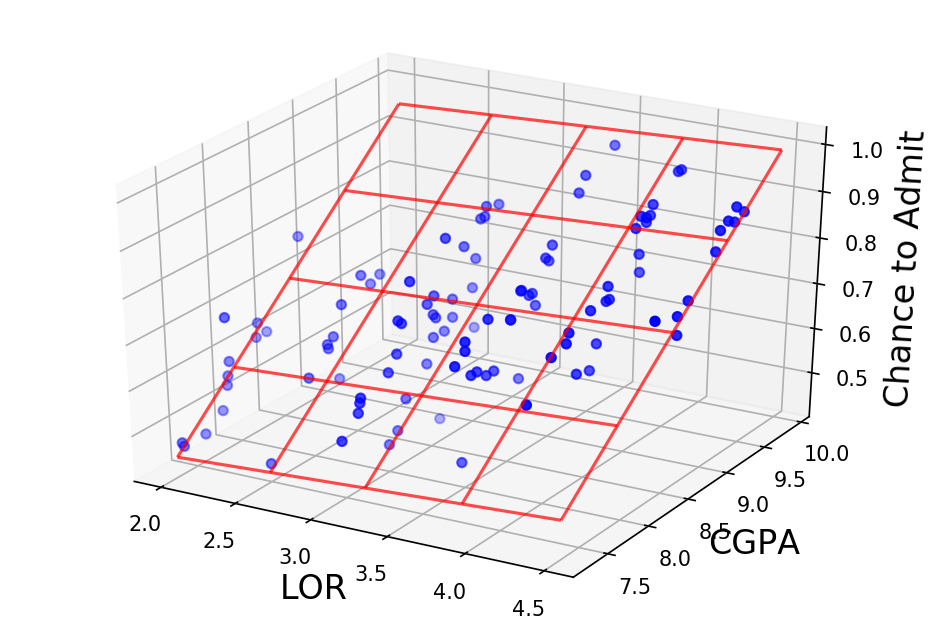

In [20]:
fig = plt.figure(dpi= 150)
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(x_test['LOR '], x_test['CGPA'], y_test, color='blue')
ax.set_xlabel('LOR', fontsize=16)
ax.set_ylabel('CGPA', fontsize=16)
ax.set_zlabel('Chance to Admit', fontsize=16)

x = np.linspace(data['LOR '].min(), data['LOR '].max(), 5)
y = np.linspace(data['CGPA'].min(), data['CGPA'].max(), 5)
x, y = np.meshgrid(x, y)

z = regr_best.params['const'] + regr_best.params['LOR '] * x + regr_best.params['CGPA'] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='red', alpha=0.7)

plt.show()

<a id="esercizio3"></a>
## Esercizio clustering e classificazione con NN

In questo terzo esercizio viene proposso un esercizio di clusterizzazione e di predizione con Rete Neurale.

Da principio, per questo esercizio, leggiamo il dataset `data/wine.csv`, che contiene le caratteristiche di alcune tipologie di vino. I dati contengono i seguenti attributi:

- Alcohol 
- Malic acid 
- Ash 
- Alcalinity of ash 
- Magnesium 
- Total phenols 
- Flavanoids 
- Nonflavanoid phenols 
- Proanthocyanins 
- Color intensity 
- Hue 
- OD280/OD315 of diluted wines 
- Proline 

L'esercizio chiede quindi di provare a prendere questi dati e di farne una clusterizzazione.
Le dimensioni da usare per la clusterizzazione, e per la rappresentazione scatter, sono `phenols` e `alcohol`.

Quanti gruppi convinene creare? Per scegliere questa dimensione è necessario utilizzare il metodo elbow o il metodo silhouette.
Rappresentare i dati clusterizzati.

Dopo aver fatto questa clusterizzazione è possibile leggere il dataset `data/wine-with-answers.csv`. Questo dataset è uguale al precedente ma aggiunge una colonna, la colonna `class`. Questa colonna rappresenta una classificazione dei vini fatta da un esperto enologo in tre classi (1, 2 o 3) in base alle caratteristiche del vino stesso.

L'esercizio chiede a questo punto di creare una rete neurale in grado di apprendere in modo supervised le classificazioni dei vini partendo dai loro 13 attributi.

Creare il modello, farlo apprendere e valutarne l'accuratezza su un insieme di test dei dati.

### Librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Per il preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
# Per il clustering
from sklearn.cluster import KMeans
# Per il confronto clustering vs. classi
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Per le reti neurali

# Creazione
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Visualizzazione
from graphviz import Digraph
import json

### Importazione ed esplorazione dei dati

In [2]:
# Importazione dati
data = pd.read_csv('./data/wine.csv')

# Esplorazione
data.head()

,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Dimensioni
data.shape

(178, 13)

In [4]:
# Principali statistiche descrittive
data.describe()

,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,diluted,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,1.710000,4.000000,1680.000000


In [5]:
# Missing values
mv = data.isnull().values.any()
if (mv == False):
    print("Il dataset non contiene valori mancanti")
else:
    print("Il dataset contiene valori mancanti" + "\n")
    mv = (data.isnull().sum() / data.values.len())*100
    print('La percentuale di valori mancanti nel dataset è del %0.2f %'.format(mv))

Il dataset non contiene valori mancanti


Il dataset è composto da 178 osservazioni e 13 attributi. I suoi attributi non presentano una distribuzione particolarmente variabile e non sembrano avere particolari valori estremi.

Text(0, 0.5, 'Alcohol')

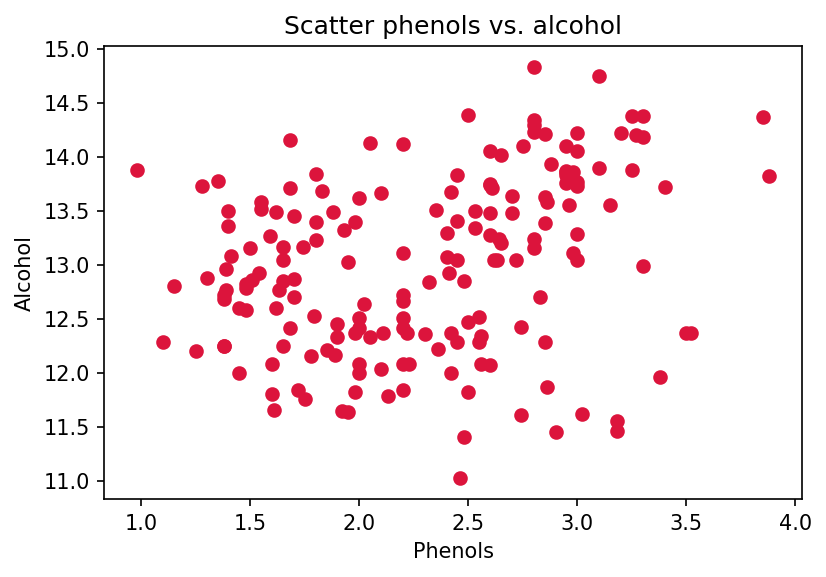

In [6]:
# Scatter delle variabili d'interesse
plt.figure(dpi= 150)
plt.scatter(data['phenols'], data['alcohol'], color= 'crimson')
plt.title("Scatter phenols vs. alcohol")
plt.xlabel("Phenols")
plt.ylabel("Alcohol")

### Clustering

#### Scelta del numero ottimale di clusters attraverso il metodo Elbow, detto anche del gomito

Text(0, 0.5, "Somma dei quadrati all'interno del cluster")

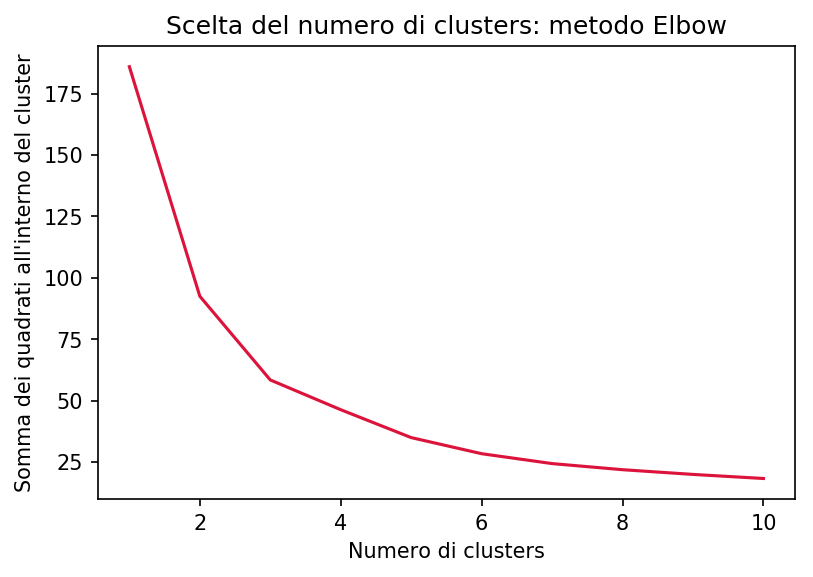

In [7]:
x = data[['phenols', 'alcohol']]
wcss = []
cl_num = 11
number_clusters = range(1, cl_num)

for i in number_clusters:
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
plt.figure(dpi= 150)
plt.plot(number_clusters, wcss, c= 'crimson')
plt.title('Scelta del numero di clusters: metodo Elbow')
plt.xlabel('Numero di clusters')
plt.ylabel("Somma dei quadrati all'interno del cluster")

Secondo il metodo Elbow il numero ottimale di clusters secondo il modello per i nostri dati può essere 2 o 3, quindi vedremo entrambi i modelli e sceglierò quello che mi sembra migliore.

#### Visualizzazione dei modelli

Text(0, 0.5, 'Alcohol')

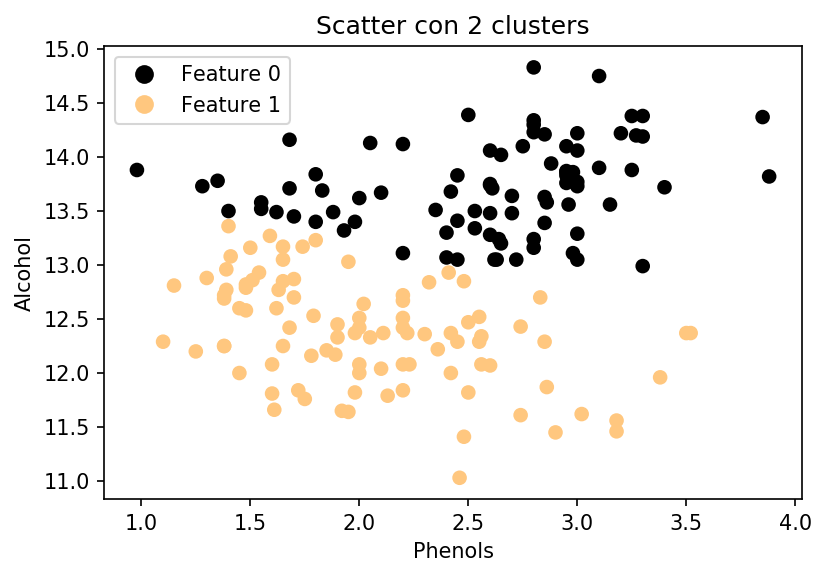

In [8]:
# Con 2 clusters
kmeans = KMeans(2)

identified_clusters = kmeans.fit_predict(x)
data_cts = data.copy()
data_cts['Clusters_2'] = identified_clusters

plt.figure(dpi= 150)

sc = plt.scatter(data_cts['phenols'], data_cts['alcohol'], c= data_cts['Clusters_2'], 
                 cmap= 'copper')
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(81), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data_cts['Clusters_2'])]

plt.legend(handles=handles)
plt.title("Scatter con 2 clusters")
plt.xlabel("Phenols")
plt.ylabel("Alcohol")

Text(0, 0.5, 'Alcohol')

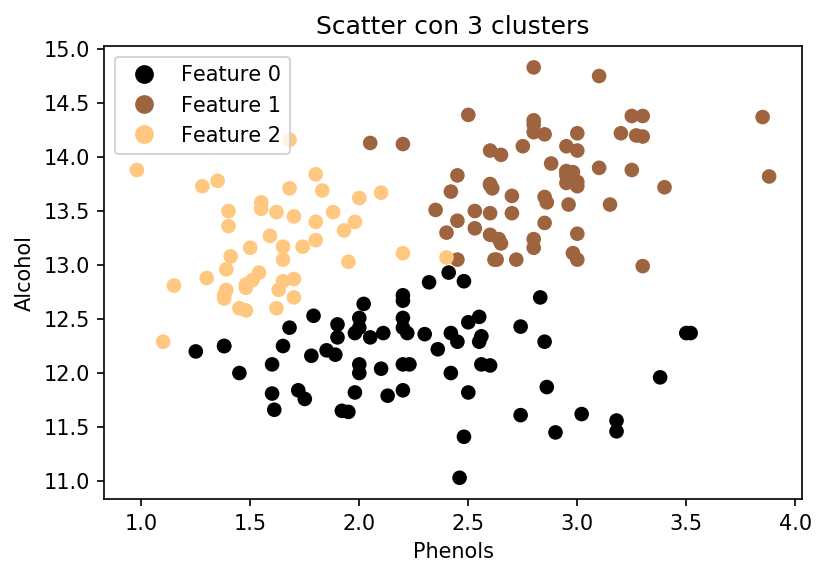

In [9]:
# Con 3 clusters
kmeans = KMeans(3)

identified_clusters = kmeans.fit_predict(x)
data_cts['Clusters_3'] = identified_clusters

plt.figure(dpi= 150)

sc = plt.scatter(data_cts['phenols'], data_cts['alcohol'], c= data_cts['Clusters_3'], 
                 cmap= 'copper')
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(81), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data_cts['Clusters_3'])]

plt.legend(handles=handles)
plt.title("Scatter con 3 clusters")
plt.xlabel("Phenols")
plt.ylabel("Alcohol")

Entrambi i modelli mostrano dei cluster molto riconoscibili e distinti tra loro, quindi, siccome il modello con 3 clusters ha un'inertia tra le classi minore e presenta degli ottimi clusters, scelgo questo come modello.

#### Confronto dei clusters con la classificazione in 3 classi effettuata da un esperto enologo

##### Importazione ed esplorazione del dataset con valutazione

In [10]:
# Importazione
data_awr = pd.read_csv('./data/wine-with-answers.csv')
# Primi valori
data_awr.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# Dimensioni
data_awr.shape

(178, 14)

In [12]:
# Principali statistiche descrittive
data_awr.describe()

,class,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
# Missing values
mv = data_awr.isnull().values.any()
if (mv == False):
    print("Il dataset non contiene valori mancanti")
else:
    print("Il dataset contiene valori mancanti" + "\n")
    mv = (data_awr.isnull().sum() / data_awr.values.len())*100
    print('La percentuale di valori mancanti nel dataset è del %0.2f %'.format(mv))

Il dataset non contiene valori mancanti


Questo dataset è come il dataset precedente tranne per il fatto che prsenta un attributo in più chiamato **class** che rappresenta la classe di vino data da un esperto enologo.

##### Confronto

Text(0, 0.5, 'Alcohol')

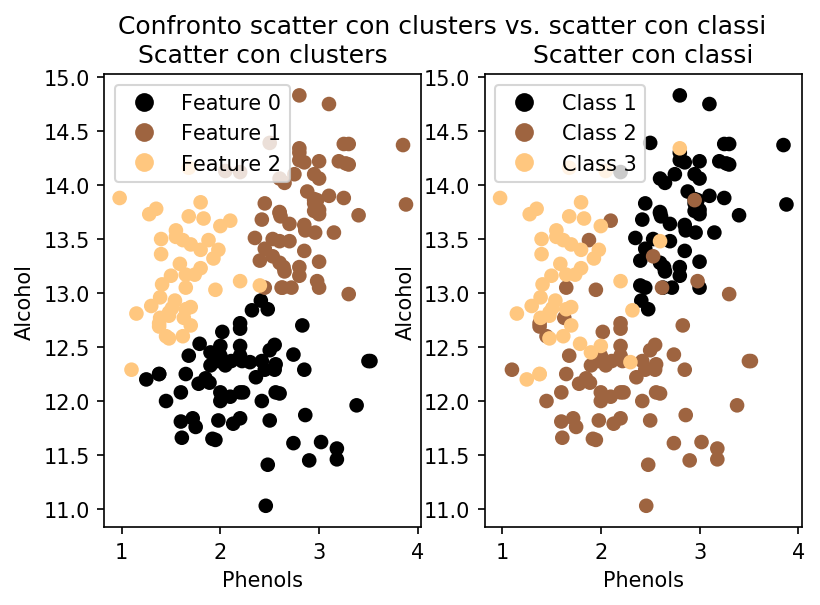

In [14]:
# Scatter clusters vs. classi
fig = plt.figure(dpi= 150)
gs = fig.add_gridspec(1,2)

fig.suptitle("Confronto scatter con clusters vs. scatter con classi")

ax1 = fig.add_subplot(gs[0,0])

sc = ax1.scatter(data['phenols'], data['alcohol'], c= data_cts['Clusters_3'], 
                 cmap= 'copper')
lp = lambda i: ax1.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(81), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data_cts['Clusters_3'])]

ax1.legend(handles=handles)
ax1.set_title("Scatter con clusters")
ax1.set_xlabel("Phenols")
ax1.set_ylabel("Alcohol")


ax2 = fig.add_subplot(gs[0,1])

sc = ax2.scatter(data_awr['phenols'], data_awr['alcohol'], c= data_awr['class'], 
                 cmap= 'copper')
lp = lambda i: ax2.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(81), mec="none",
                        label="Class {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data_awr['class'])]

ax2.legend(handles=handles)
ax2.set_title("Scatter con classi")
ax2.set_xlabel("Phenols")
ax2.set_ylabel("Alcohol")

Text(69.58333333333334, 0.5, 'Clusters')

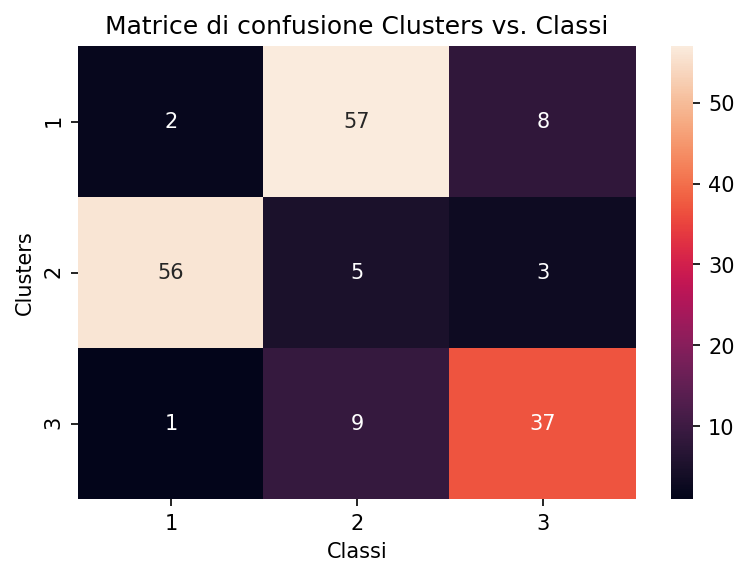

In [15]:
# Matrice di confusione clusters vs. classi
cls_remapped = data_cts.Clusters_3.map({0:1, 1:2, 2:3})
cm = confusion_matrix(cls_remapped, data_awr['class'])

fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
ax = sns.heatmap(cm, annot= True, xticklabels=['1','2','3'], yticklabels=['1','2','3'])
ax.set_title("Matrice di confusione Clusters vs. Classi")
ax.set_xlabel("Classi")
ax.set_ylabel("Clusters")

### Classificazione con reti neurali

Siccome abbiamo visto che già utilizzando 2 variabili di ottiene un'accuracy di circa il 95% e il dataset è composto da pochi dati, creerò una rete densa, ovvero in cui ogni nodo di un livello è connesso ad ogni nodo del livello successivo, composta da 3 neuroni in input, 3 livelli nascosti con 39 (13x3) neuroni nel primo livello, 21 (7x3) nel secondo e 18 (6x3) nel terzo, e infine 3 neuroni nell'ultimo livello. Come funzione di loss utilizzerò la cross_entropy e la rete sarà addresta in 50 epoche.

#### Estrazione dei dati e preprocessing

In [16]:
x = data_awr.drop(['class'], axis = 1)
y = data_awr['class']

x = StandardScaler().fit_transform(x)
y = LabelBinarizer().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

/Users/tornetto/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tornetto/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Creazione e visualizzazione rete neurale

In [17]:
# Creazione rete
nn = Sequential()

nn.add(Dense(39, input_dim= 13, kernel_initializer='uniform', activation= 'relu'))
nn.add(Dense(units= 21, kernel_initializer='uniform', activation= 'relu'))
nn.add(Dense(units= 18, kernel_initializer='uniform', activation= 'relu'))
nn.add(Dense(units= 3, kernel_initializer='uniform', activation= 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
"""
Visualizzazione rete neurale

Codice riadattato dalla funzione visualize.py contenuta nel pacchetto ann_visualizer creato da
ProdiCode.

Il codice crea un grafo dal modello Keras attraverso la libreria webgraph, lo salva in un file
in formato .gv e lo visualizza attraverso lo strumento di visualizzazione predefinito di
sistema per poi essere savato in un file dal formato comune (.pdf, .png, .svg) per essere poi
importato nel notebook.

"""

input_layer = 0
hidden_layers_nr = 0
layer_types = []
hidden_layers = []
output_layer = 0
    
for layer in nn.layers:
    if(layer == nn.layers[0]):
        input_layer = int(str(layer.input_shape).split(",")[1][1:-1])
        hidden_layers_nr += 1
        if (type(layer) == keras.layers.Dense):
            hidden_layers.append(int(str(layer.output_shape).split(",")[1][1:-1]))
            layer_types.append("Dense")
        else:
            hidden_layers.append(1)
            if (type(layer) == keras.layers.Conv2D):
                layer_types.append("Conv2D")
            elif (type(layer) == keras.layers.MaxPooling2D):
                layer_types.append("MaxPooling2D")
            elif (type(layer) == keras.layers.Dropout):
                layer_types.append("Dropout")
            elif (type(layer) == keras.layers.Flatten):
                layer_types.append("Flatten")
            elif (type(layer) == keras.layers.Activation):
                layer_types.append("Activation")
    else:
        if(layer == nn.layers[-1]):
            output_layer = int(str(layer.output_shape).split(",")[1][1:-1])
        else:
            hidden_layers_nr += 1
            if (type(layer) == keras.layers.Dense):
                hidden_layers.append(int(str(layer.output_shape).split(",")[1][1:-1]))
                layer_types.append("Dense")
            else:
                hidden_layers.append(1)
                if (type(layer) == keras.layers.Conv2D):
                    layer_types.append("Conv2D")
                elif (type(layer) == keras.layers.MaxPooling2D):
                    layer_types.append("MaxPooling2D")
                elif (type(layer) == keras.layers.Dropout):
                    layer_types.append("Dropout")
                elif (type(layer) == keras.layers.Flatten):
                    layer_types.append("Flatten")
                elif (type(layer) == keras.layers.Activation):
                    layer_types.append("Activation")
    last_layer_nodes = input_layer
    nodes_up = input_layer
    if(type(nn.layers[0]) != keras.layers.Dense):
        last_layer_nodes = 1
        nodes_up = 1
        input_layer = 1

    g = Digraph('g', filename="./models/wine_network.gv")
    n = 0
    g.graph_attr.update(splines="false", nodesep='1', ranksep='2')
    #Input Layer
    with g.subgraph(name='cluster_input') as c:
        if(type(nn.layers[0]) == keras.layers.Dense):
            the_label = 'Wine Neural Network' + '\n\n\n\nInput Layer'
            if (int(str(nn.layers[0].input_shape).split(",")[1][1:-1]) > 10):
                the_label += " (+"+str(int(str(nn.layers[0].input_shape).split(",")[1][1:-1]) - 10)+")"
                input_layer = 10
            c.attr(color='white')
            for i in range(0, input_layer):
                n += 1
                c.node(str(n))
                c.attr(label=the_label)
                c.attr(rank='same')
                c.node_attr.update(color="indigo", style="filled", fontcolor="indigo", shape="circle")
                
    for i in range(0, hidden_layers_nr):
            with g.subgraph(name="cluster_"+str(i+1)) as c:
                if (layer_types[i] == "Dense"):
                    c.attr(color='white')
                    c.attr(rank='same')
                    #If hidden_layers[i] > 10, dont include all
                    the_label = ""
                    if (int(str(nn.layers[i].output_shape).split(",")[1][1:-1]) > 10):
                        the_label += " (+"+str(int(str(nn.layers[i].output_shape).split(",")[1][1:-1]) - 10)+")"
                        hidden_layers[i] = 10
                    c.attr(labeljust="right", labelloc="b", label=the_label)
                    for j in range(0, hidden_layers[i]):
                        n += 1
                        c.node(str(n), shape="circle", style="filled", color="moccasin", fontcolor="moccasin")
                        for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                            g.edge(str(h), str(n))
                    last_layer_nodes = hidden_layers[i]
                    nodes_up += hidden_layers[i]
                    
    with g.subgraph(name='cluster_output') as c:
            if (type(nn.layers[-1]) == keras.layers.Dense):
                c.attr(color='white')
                c.attr(rank='same')
                c.attr(labeljust="1")
                for i in range(1, output_layer+1):
                    n += 1
                    c.node(str(n), shape="circle", style="filled", color="#e74c3c", fontcolor="#e74c3c")
                    for h in range(nodes_up - last_layer_nodes + 1 , nodes_up + 1):
                        g.edge(str(h), str(n))
                c.attr(label='Output Layer', labelloc="bottom")
                c.node_attr.update(color="coral", style="filled", fontcolor="coral", shape="circle")

    g.attr(arrowShape="none")
    g.edge_attr.update(arrowhead="none", color="#707070")
    g.view()

<img src="./images/wine_network.gv.pdf">

#### Addrestamento e fitting

In [18]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = nn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Train on 124 samples, validate on 54 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
124/124 [==============================] - 0s 2ms/sample - loss: 1.0983 - acc: 0.4355 - val_loss: 1.0979 - val_acc: 0.3889
Epoch 2/50
124/124 [==============================] - 0s 87us/sample - loss: 1.0974 - acc: 0.4032 - val_loss: 1.0971 - val_acc: 0.3889
Epoch 3/50
124/124 [==============================] - 0s 81us/sample - loss: 1.0963 - acc: 0.4032 - val_loss: 1.0960 - val_acc: 0.3889
Epoch 4/50
124/124 [==============================] - 0s 83us/sample - loss: 1.0950 - acc: 0.4032 - val_loss: 1.0943 - val_acc: 0.3889
Epoch 5/50
124/124 [==============================] - 0s 78us/sample - loss: 1.0928 - acc: 0.4032 - val_loss: 1.0919 - val_acc: 0.3889
Epoch 6/50
124/124 [==============================] - 0s 79us/sample - loss: 1.0898 - acc: 0.4032 - val_loss: 1.0885 - val_acc: 0.3889
Epoch 7/50
124/124 [==============================] - 0s 83us/sample - loss: 1.0854 - acc: 0.4032 

#### Prestazioni

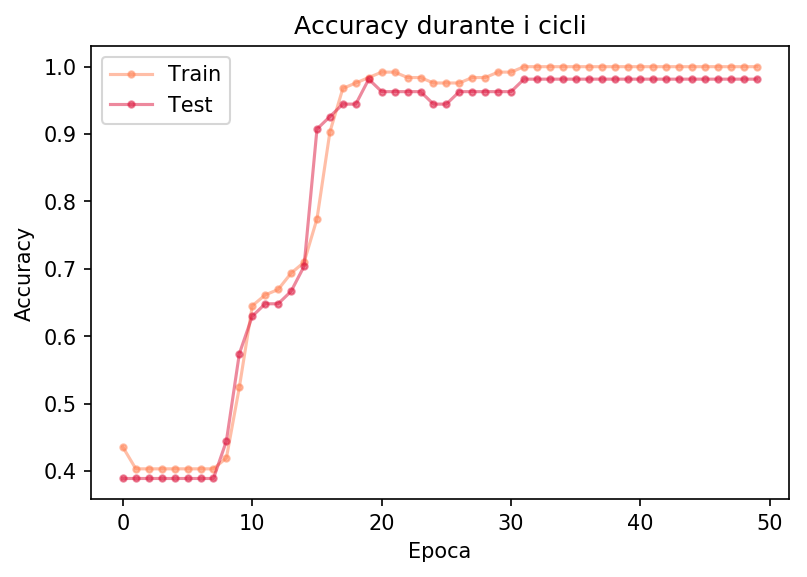

In [19]:
# Grafico accuracy durante i vari cicli
fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
ax.plot(history.history['acc'], c= 'coral', marker= '.', alpha= 0.5)
ax.plot(history.history['val_acc'], c= 'crimson', marker= '.', alpha= 0.5)
ax.set_title("Accuracy durante i cicli")
ax.set_xlabel("Epoca")
ax.set_ylabel("Accuracy")
ax.legend(['Train', 'Test'])

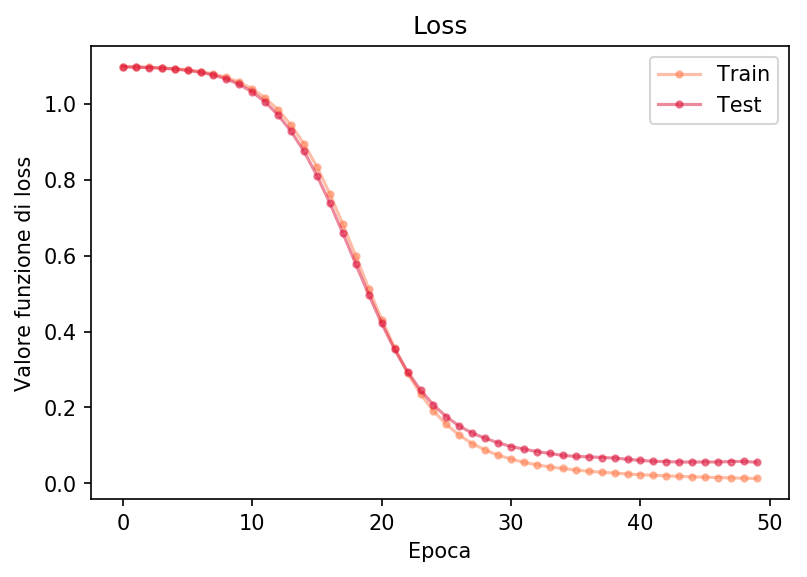

In [20]:
# Grafico della perdita di loss durante i cicli
fig = plt.figure(dpi= 150)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], c= 'coral', marker= '.', alpha= 0.5)
ax.plot(history.history['val_loss'], c= 'crimson', marker= '.', alpha= 0.5)
ax.set_title('Loss')
ax.set_xlabel("Epoca")
ax.set_ylabel("Valore funzione di loss")
ax.legend(['Train','Test'])

Come si può vedere la nostra rete apprende molto bene e già dopo una decina di epoche presenta già un'alta accuracy e un bassissimo valore di loss.  
Dopo le 50 epoche raggiunge un'accuracy di 0.963 sul training set e un valore della fuzione di loss di 0.0715.